In [109]:
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image, ImageFilter
from skimage.filters import gaussian
import numpy as np 

In [110]:
result_path = '/home/users/abhishekm/projects/Wav2Lip/patch_smoothing/10_v3/lipsync/000091.jpg'
image_path =  '/home/users/abhishekm/projects/Wav2Lip/patch_smoothing/10_v3/lipsync-pre-patch/000091.jpg'
patch_path = '/home/users/abhishekm/projects/Wav2Lip/patch_smoothing/10_v3/lipsync-patch/000091.jpg'
y1, y2, x1, x2 = 55, 228, 32, 183

In [111]:
patch = Image.open(patch_path) 
final = Image.open(result_path)
image = Image.open(image_path)

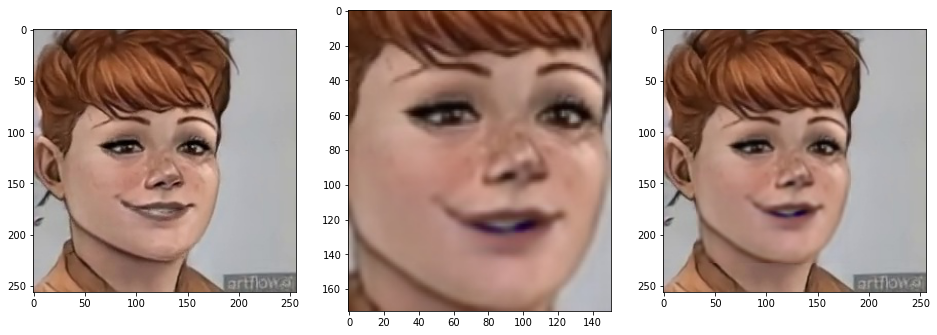

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(16, 9))
ax[0].imshow(image)
ax[1].imshow(patch)
ax[2].imshow(final)

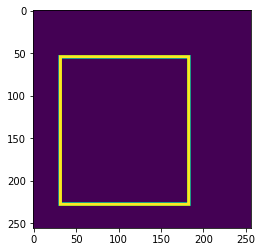

In [122]:
mask = np.zeros(final.size)
width = 2
mask[y1-width:y2+width, x1-width:x2+width] = 1
mask[y1+width:y2-width, x1+width:x2-width] = 0 
plt.imshow(mask)

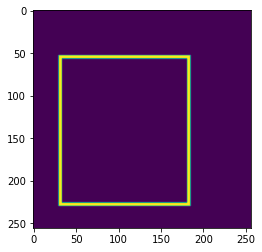

In [123]:
sigma = 0.5
smooth_mask = gaussian(mask, sigma=sigma)
plt.imshow(smooth_mask)

/home/users/abhishekm/anaconda3/envs/vchmr/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until


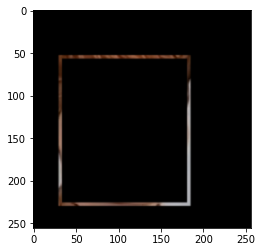

In [124]:
cutout = smooth_mask[...,None] * final
# cutout = mask[...,None] * final
smoothed_cutout = gaussian(cutout, sigma=sigma)
plt.imshow(smoothed_cutout.astype(np.uint8))

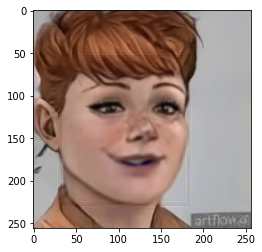

In [125]:
final_image = smoothed_cutout + (1 - smooth_mask[...,None]) * final 
plt.imshow(final_image.astype(np.uint8))

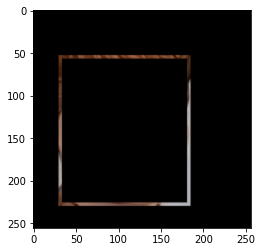

In [134]:
final_image = smooth_mask[..., None] * final
plt.imshow(final_image.astype(np.uint8))

In [126]:
def quantimage(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

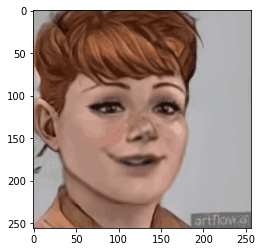

In [128]:
q_image = quantimage(np.asarray(final), 55)
plt.imshow(q_image)

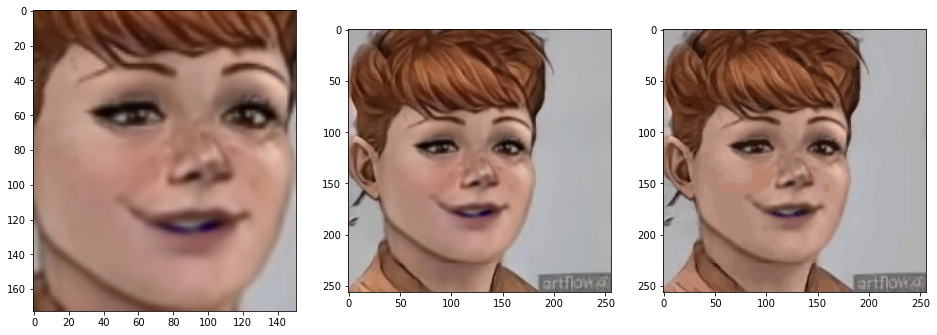

In [278]:
q_image = quantimage(np.asarray(final), 75)
fig, ax = plt.subplots(1, 3, figsize=(16, 9))
ax[0].imshow(patch)
ax[1].imshow(final)
ax[2].imshow(q_image)

In [281]:
result_path = '/home/users/abhishekm/projects/Wav2Lip/patch_smoothing-2/10_v3/lipsync/000088.jpg'
# image_path =  '/home/users/abhishekm/projects/Wav2Lip/patch_smoothing-2/10_v3/lipsync-pre-patch/000088.jpg'
patch_path = '/home/users/abhishekm/projects/Wav2Lip/patch_smoothing-2/10_v3/lipsync-patch/000088.jpg'

In [282]:
patch = Image.open(patch_path) 
final = Image.open(result_path)

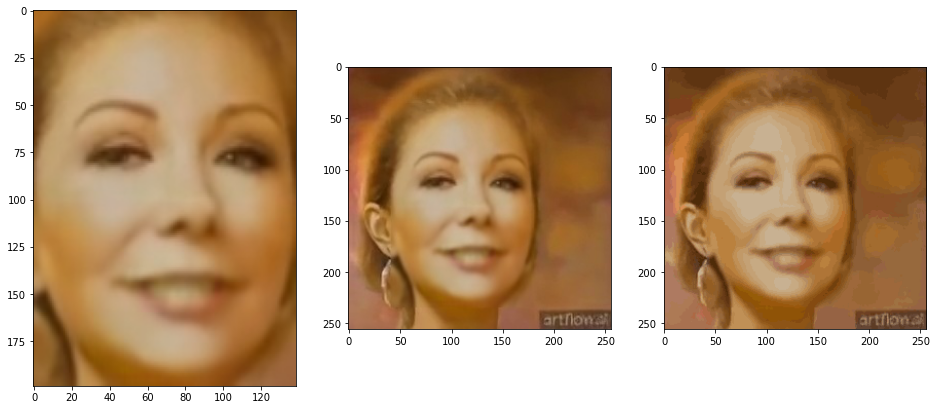

In [283]:
q_image = quantimage(np.asarray(final), 60)
fig, ax = plt.subplots(1, 3, figsize=(16, 9))
ax[0].imshow(patch)
ax[1].imshow(final)
ax[2].imshow(q_image)

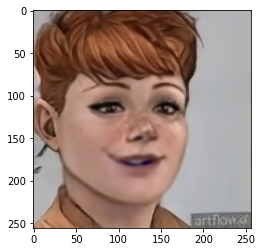

In [158]:
np_final = np.asarray(final)
h = y2 - y1 
w = x2 - x1 
chin_point = (x1 + x2) // 2
width_w = 30
width_h = 10
# Grab ROI with Numpy slicing and blur
ROI = np_final[y2-width_h:y2+width_h, chin_point-width_w:chin_point+width_w]
blur = cv2.GaussianBlur(ROI, (7,7), 0) 

# Insert ROI back into image
np_final[y2-width_h:y2+width_h, chin_point-width_w:chin_point+width_w] = blur
plt.imshow(np_final)

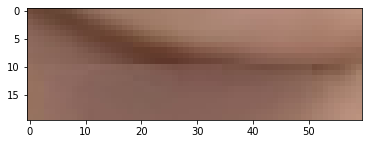

In [150]:
h = y2 - y1 
w = x2 - x1 
chin_point = (x1 + x2) // 2
width_w = 30
width_h = 10
ROI = np_final[y2-width_h:y2+width_h, chin_point-width_w:chin_point+width_w]
plt.imshow(ROI)

In [139]:
np_final = np.asarray(final)

In [143]:
chin_point

107